In [1]:
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import model_from_yaml

Using TensorFlow backend.


# <center> Paso 1 - Preparacion de entorno

In [2]:
"""
Aqui es donde se carga el modelo
"""
# Primero se define la constante de las rutas de la ubicacion
MODEL_PATH = 'model_12_03_2020.yaml'
WEIGHTS_PATH= 'model_12_03_2020.h5'

# Se ejecutan para cargarlos
yaml_file = open(MODEL_PATH, 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
# Se cargan los pesos de las conexiones
loaded_model.load_weights(WEIGHTS_PATH)
print("Modelo cargado de archivos guardados")
 


Modelo cargado de archivos guardados


In [9]:
"""
Seccion para definir variables globales, con esto solo se define una vez y se usa donde quiera
"""

MAX_INDEX = 150
TRAIN_DIR = './input/asl_alphabet_train/asl_alphabet_train'
TEST_DIR= './input/asl_alphabet_test/asl_alphabet_test'


LABELS_DICT = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'J': 9,
    'K': 10,
    'L': 11,
    'M': 12,
    'N': 13,
    'O': 14,
    'P': 15,
    'Q': 16,
    'R': 17,
    'S': 18,
    'T': 19,
    'U': 20,
    'V': 21,
    'W': 22,
    'X': 23,
    'Y': 24,
    'Z': 25,
    'space': 26,
    'del': 27,
    'nothing': 28,
}

In [10]:
"""
Seccion para definir funciones utiles
"""

def load_full_test_data():
    """
    Esta es la version light para cargar la informacion donde se tomara todos los datos para hacer las pruebas
    """
    images = []
    labels = []
    size = 64, 64
    print("Cargando...")
    for folder in os.listdir(TRAIN_DIR):
        print(folder, end = ' | ')
        
        for image in os.listdir(TRAIN_DIR + '/' + folder)[0:MAX_INDEX]:
            temp_img = cv2.imread(TRAIN_DIR + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(LABELS_DICT[folder])
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    labels = keras.utils.to_categorical(labels)
    
    print()

    print('Cargado', len(images),'imagenes para validacion','Dimensiones de datos de validacion =',images.shape)
    return images, labels


def load_test_data():
    images = []
    names = []
    size = 64, 64
    for image in os.listdir(TEST_DIR):
        temp = cv2.imread(TEST_DIR + '/' + image)
        temp = cv2.resize(temp, size)
        images.append(temp)
        names.append(image)
        
    images = np.array(images)
    images = images.astype('float32')/255.0
    return images, names


def get_labels_for_plot(predictions):
    """
    Funcion para obtener la etiqueta de la letra
    """
    predictions_labels = []
    for i in range(len(predictions)):
        for ins in LABELS_DICT:
            if predictions[i] == LABELS_DICT[ins]:
                predictions_labels.append(ins)
                break
    return predictions_labels

def plot_image_1(fig, image, label, prediction, predictions_label, row, col, index):
    """
    Funcion para graficar las imagenes en el paso 5 de validacion
    """
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    title = "Prediccion : [%s] \n Real : [%s]" % (predictions_label, label)
    plt.title(title)
    return


In [5]:
images, labels = load_full_test_data()

Cargando...
A | B | C | D | del | E | F | G | H | I | J | K | L | M | N | nothing | O | P | Q | R | S | space | T | U | V | W | X | Y | Z | 
Cargado 4350 imagenes para validacion Dimensiones de datos de validacion = (4350, 64, 64, 3)


In [6]:

loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
evaluate_metrics = loaded_model.evaluate(images, labels, verbose=1)

print("\n Evaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100, "\n Evaluation loss = ", "{:.6f}".format(evaluate_metrics[0])))

4350/4350 [==============================] - 3s 613us/step

 Evaluation Accuracy =  99.98%


In [11]:
test_images, test_img_names = load_test_data()
predictions = [loaded_model.predict_classes(image.reshape(1, 64, 64, 3))[0] for image in test_images]
predictions_labels_plot = get_labels_for_plot(predictions)

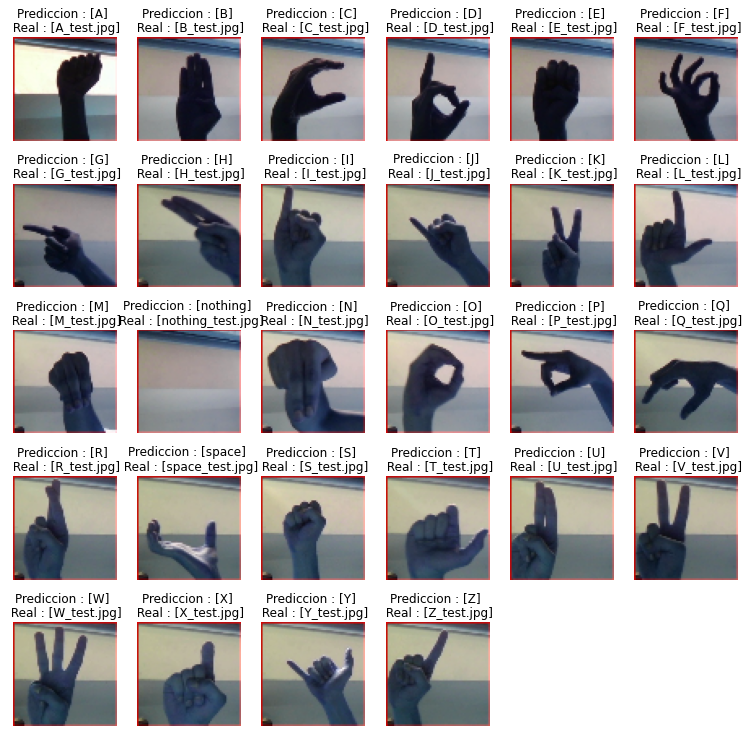

In [12]:
predfigure = plt.figure(figsize = (13, 13))
image_index = 0
row = 5
col = 6
for i in range(1, (row * col - 1)):
    plot_image_1(
        predfigure, 
        test_images[image_index], 
        test_img_names[image_index],
        predictions[image_index],
        predictions_labels_plot[image_index],
        row,
        col,
        i)
    image_index = image_index + 1
plt.show()